# Analysis of Factors Contributing to the Success of a Movie 

## SetUp and Data Loading 

In [180]:
import pandas as pd
import numpy as np

In [181]:
data = pd.read_csv("dataset/movies.csv")
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [182]:
data.shape

(7668, 15)

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [184]:
data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Data Cleaning

### Checking for missing data

In [185]:
for col in data.columns:
    percent = np.mean(data[col].isnull())
    print(f"{col} - {round(percent*100)}%")


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


Since, the missing values in gross and rating column if very very low. It can simply be remove that and fill the rest value in budget column with same genre mean.

### Handling misisng values

In [186]:
# Removing the null value
data = data.dropna(subset=["rating","gross"])
data.shape

(7425, 15)

In [187]:
# Filling values
data['budget'] = data.groupby('genre')['budget'].transform(lambda x:x.fillna(x.mean()))
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [188]:
# Drop Duplicates
data.drop_duplicates()
data.shape

(7425, 15)

There is no duplication of data found in the dataset

### Add dervied column(s) and change the dtype

In [189]:
import re

sum(data['year']==data['released'].apply(lambda x:int(''.join(re.findall('\\d{4}', x)))))

6187

Since, count of actually rows is not same. It mean there is year inconsistency in "year" column compare to actual year in "released" column.

In [190]:
# Replace the corrected year and also change the dtype of year

data['year'] = data['released'].apply(lambda x:''.join(re.findall('\\d{4}',x)))
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [202]:
data['month'] = data['released'].apply(lambda x:''.join(x.split()[0]) if x.split()[0].isalpha() else 'NA')
data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,May


## Data Exploration

In [203]:
# Sorting the movie based on gross
data.sort_values(by=['gross'],inplace=False,ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
6295,Oz the Great and Powerful,PG,Adventure,2013,"March 8, 2013 (United States)",6.3,201000.0,Sam Raimi,Mitchell Kapner,James Franco,United States,2.150000e+08,493311825.0,Walt Disney Pictures,130.0,March
5674,Clash of the Titans,PG-13,Action,2010,"April 2, 2010 (United States)",5.8,274000.0,Louis Leterrier,Travis Beacham,Sam Worthington,United States,1.250000e+08,493214993.0,Warner Bros.,106.0,April
7512,Maleficent: Mistress of Evil,PG,Adventure,2019,"October 18, 2019 (United States)",6.6,91000.0,Joachim Rønning,Linda Woolverton,Angelina Jolie,United States,1.850000e+08,491730089.0,Walt Disney Pictures,119.0,October
7107,War for the Planet of the Apes,PG-13,Action,2017,"July 14, 2017 (United States)",7.4,235000.0,Matt Reeves,Mark Bomback,Andy Serkis,United States,1.500000e+08,490719763.0,Twentieth Century Fox,140.0,July
3854,Shrek,PG,Animation,2001,"May 18, 2001 (United States)",7.9,630000.0,Andrew Adamson,William Steig,Mike Myers,United States,6.000000e+07,487853320.0,DreamWorks Animation,90.0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,2.260290e+07,1672.0,Polygram Filmed Entertainment,87.0,October
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,2.260290e+07,1605.0,Balboa Entertainment,110.0,August
3818,"Love, Honor and Obey",R,Comedy,2001,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,2.280237e+07,1400.0,British Broadcasting Corporation (BBC),103.0,February
7580,Run with the Hunted,Not Rated,Crime,2020,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,2.260290e+07,682.0,Roxwell Films,93.0,June


It shows that Avatar, Titanic and Star Wars Episode VII are the most highest grossing movie ever.

### Handling for Outliers


In [204]:
from scipy import stats

data['zscore'] = np.abs(stats.zscore(data['gross']))
data = data[data['zscore']<2.5]
data.shape

(6900, 17)

In [205]:
data = data.drop(columns=['zscore'])
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,1.900000e+07,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.500000e+06,58853106.0,Columbia Pictures,104.0,July
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.500000e+06,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.000000e+06,39846344.0,Orion Pictures,98.0,July
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,5.500000e+05,39754601.0,Paramount Pictures,95.0,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,1.350000e+08,111105497.0,20th Century Studios,100.0,February
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,2.260290e+07,3661.0,Prowess Pictures,98.0,April
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,7.632336e+07,240663149.0,Beijing Enlight Pictures,110.0,October
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,2.280237e+07,413378.0,Pryor Entertainment,120.0,June


I explroed and answered the correlation of movie's success to key factors in its creation such as budget, company, genre, etc..

### Correlation

In [206]:
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
pd.options.mode.chained_assignment = None

Text(0.5, 1.0, 'Gross Earning vs Budget')

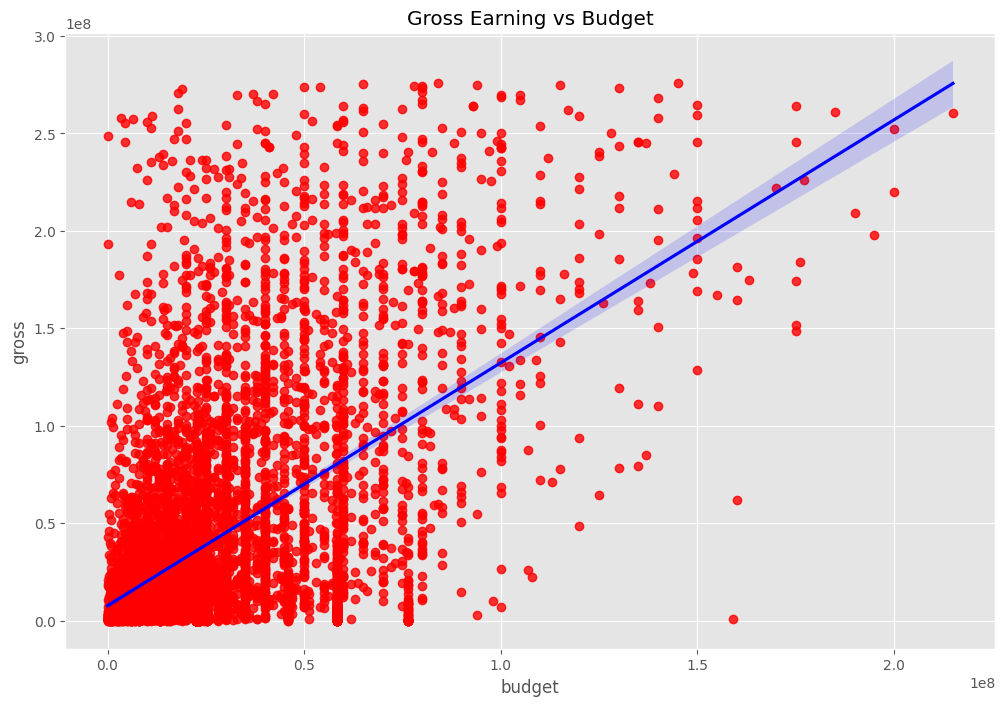

In [207]:
sns.regplot(x='budget',y='gross',data=data,scatter_kws={'color':'red'},line_kws={'color':'blue'}).set_title('Gross Earning vs Budget')

From this graph, we can determine that there is a significant relationship between the budget and gross eanrings of a movie.

In [208]:
data_numerical = data.copy()

for col_name in data_numerical.columns:
    if(data_numerical[col_name].dtype == 'object'):
        data_numerical[col_name] = data_numerical[col_name].astype('category')
        data_numerical[col_name] = data_numerical[col_name].cat.codes

data_numerical

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,5942,6,6,0,1605,8.4,927000.0,2426,3756,963,51,1.900000e+07,46998772.0,2150,146.0,6
1,5019,6,1,0,1412,5.8,65000.0,2126,1525,296,52,4.500000e+06,58853106.0,676,104.0,5
3,265,4,4,0,1412,7.7,221000.0,1222,1868,2081,52,3.500000e+06,83453539.0,1675,88.0,5
4,934,6,4,0,1458,7.3,108000.0,986,490,377,52,6.000000e+06,39846344.0,1643,98.0,5
5,1920,6,9,0,2323,6.4,123000.0,2371,4083,218,52,5.500000e+05,39754601.0,1675,95.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7651,5073,4,1,40,958,6.8,42000.0,424,2765,882,6,1.350000e+08,111105497.0,17,100.0,3
7653,5839,6,5,40,89,5.4,2400.0,2360,3631,2266,52,2.260290e+07,3661.0,1763,98.0,0
7655,2883,9,2,40,2610,6.6,1300.0,2545,-1,858,8,7.632336e+07,240663149.0,346,110.0,11
7656,6329,5,4,40,1767,5.0,294.0,2355,3624,2208,52,2.280237e+07,413378.0,1765,120.0,6


In [209]:
# Looking at the highest correlation

corr_mtx = data_numerical.corr()

corr_pairs = corr_mtx.unstack()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.367076
genre    budget    -0.367076
         gross     -0.185554
gross    genre     -0.185554
score    country   -0.146849
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
month    month      1.000000
Length: 256, dtype: float64

In [210]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.507075
votes     gross       0.507075
gross     budget      0.514803
budget    gross       0.514803
released  month       0.990632
month     released    0.990632
name      name        1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
month     month       1.000000
dtype: float64

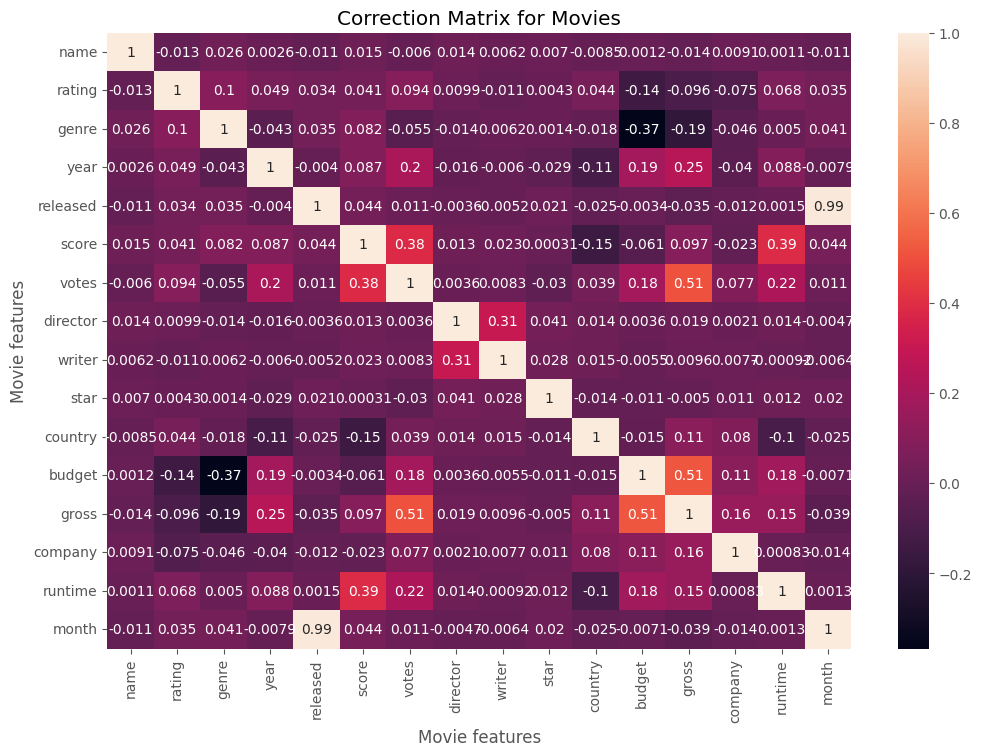

In [211]:
# Visualization

corr_matrix = data_numerical.corr(method='pearson')

sns.heatmap(corr_matrix,annot=True)
plt.title("Correction Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

**Conclusion:** The factors contributing to the success of a movie are votes and budget as they have the highest correlation. It was also determined that the Company, Movie name, Genre had no correleation.



While we have determined the factors contributing th most to a movie's succcess. There are still few other factors we can explore.

### What is the best time of the year to release a movie?

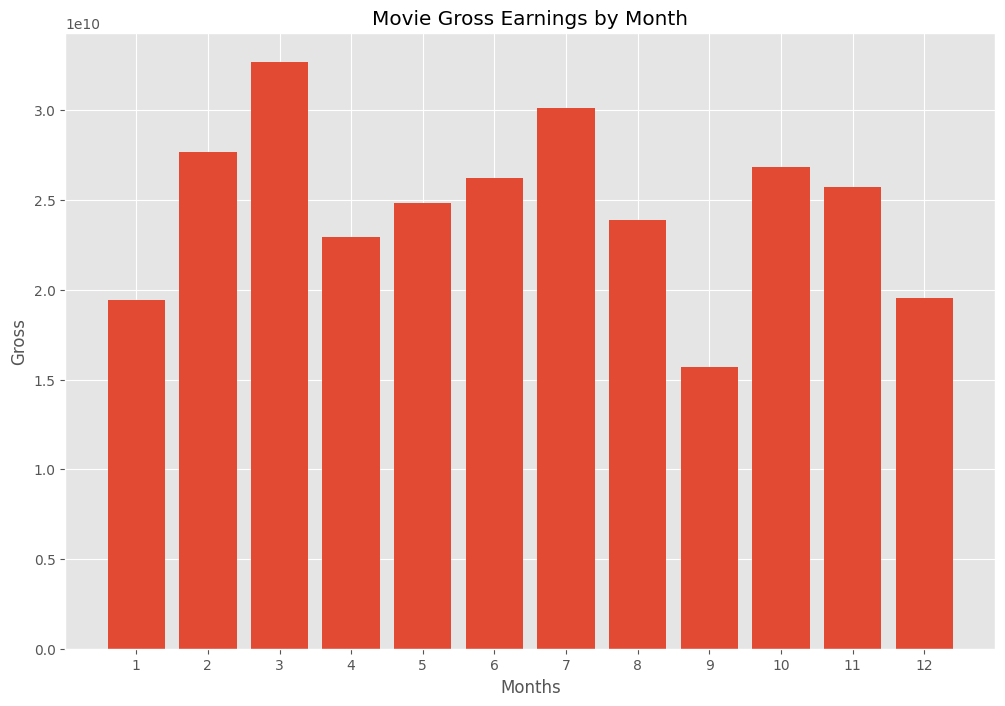

In [213]:
months = range(1,13)

df = data[data['month']!='NA']
plt.bar(months,df.groupby(['month']).sum()['gross'])
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('Gross')
plt.xlabel('Months')
plt.show()


**Conclusion:** The best time of year to release a movie are March and July based on the overall gross earnings in this period.

### What is the ideal runtime for a Movie?

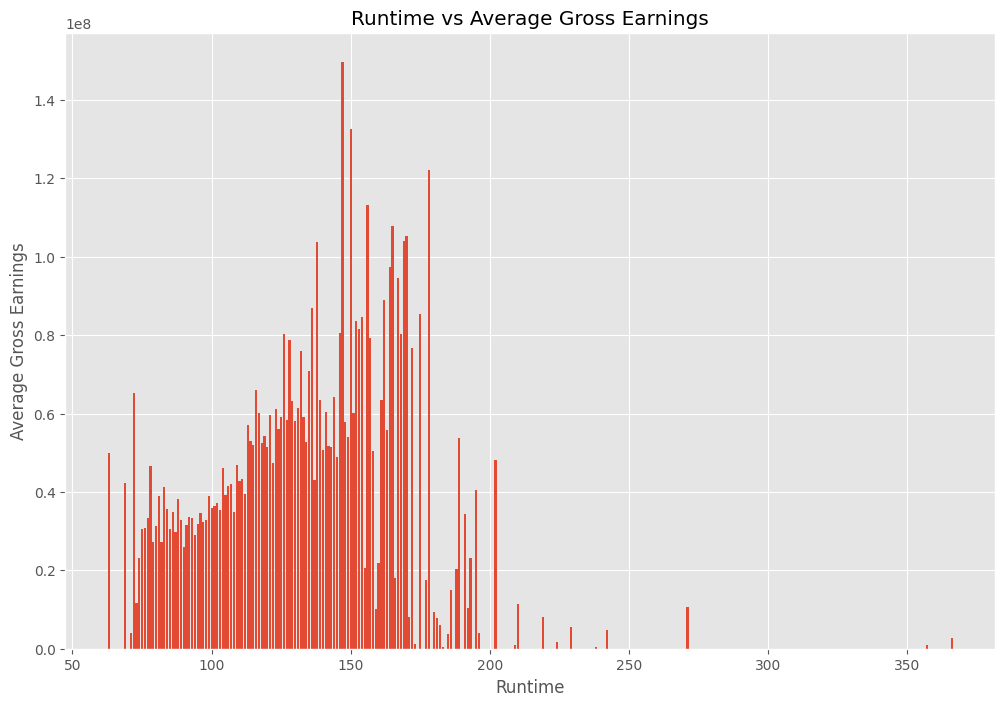

In [216]:
gross_earnings_avg = data.groupby(['runtime'])['gross'].mean()

plt.bar(gross_earnings_avg.index,gross_earnings_avg)

plt.title("Runtime vs Average Gross Earnings")
plt.xlabel("Runtime")
plt.ylabel("Average Gross Earnings")

plt.show()

**Conclusion:** According to the graph, the ideal runtime seems to be between 145 to 170 mintues.

### What genre of movie has the most success overall? What genre of movie had the msot success on average?

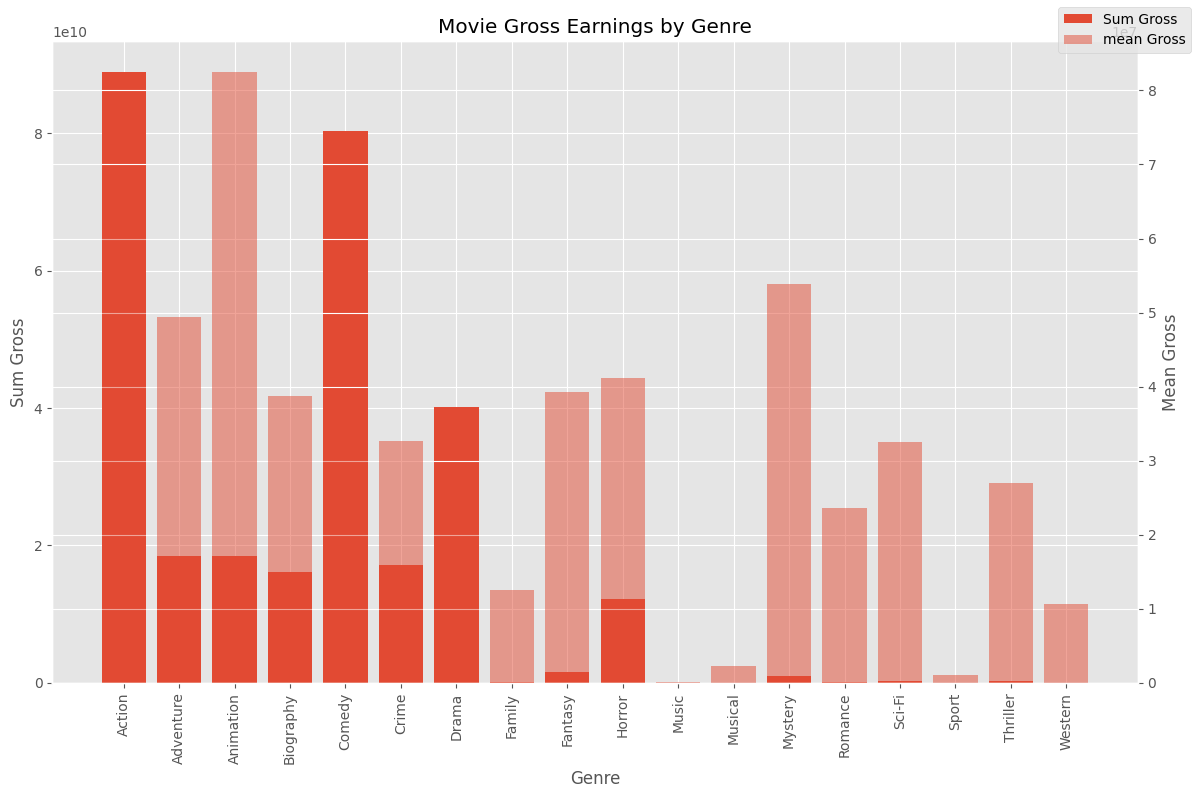

In [220]:
# Get the sum and mean of gross earning fo reach genre
groupdata = data.groupby(['genre'])['gross'].agg(['sum','mean'])
genres = groupdata.index.tolist()
sum_gross = groupdata['sum'].tolist()
mean_gross = groupdata['mean'].tolist()

fig,ax1 = plt.subplots() # set-up the bar chart
ax1.bar(genres,sum_gross,label='Sum Gross')

# Add labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Sum Gross')
ax1.tick_params(axis='y')
ax1.set_title('Movie Gross Earnings by Genre')
plt.xticks(rotation=90)

# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()
ax2.bar(genres,mean_gross,alpha=0.5,label='mean Gross')


# Add labels and title
ax2.set_ylabel('Mean Gross')
ax2.tick_params(axis='y')

fig.legend()

fig.tight_layout()

plt.show()

**Conclusion:** The Action genre had the highest level of success across all the movies, whereas the Animation genre had the highest average success rate. 

## Conclusion

The analysis revealed that the most significant factors contributing to a movie's success were the production the movie's budget and the votes. Additionally, certain genres, such as action and animation tended to be more successful than others.

Overall, my this project provided valuable insights into the factors contributing to the success of a movie.